## <center> ASSIGNMENT 2
*Sharanya Saha*<br>
21111056 <br>
*sharanya21@iitk.ac.in*

In [1]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import (polygon, circle)
from scipy import ndimage as ndi
from skimage import color
from skimage import io
import time
from math import sqrt
import matplotlib.patches as patches
from PIL import Image

The function get_triangle takes three arguments : r, c and side. 
- r and c are one of the row and column coordinates of the base of an equilateral triangle of length *side*.<br>
- It returns the coordinates of the three corners of an equilateral triangle.<br>

The function get_rectangle takes four arguments : r, c, width and height.
- r and c are one of the row and column coordinates of the base of a rectangle of with sides of length *width* and *height*.<br>
- It returns the coordinates of the four corners of the rectangle.

In [2]:
def get_triangle(r,c,side) :
    height=sqrt(3)*side/2 #Calculating the height of the equilateral triangle
    row_coordinates=[r,r,r-height]
    col_coordinates=[c,c+side,c+side/2]
    return row_coordinates,col_coordinates

In [3]:
def get_rectangle(r,c,width,height) :
    row_coordinates=[r,r,r-height,r-height]
    col_coordinates=[c,c+width,c+width,c]
    return row_coordinates,col_coordinates

##### Creating sample shapes :

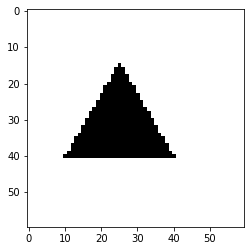

In [4]:
#Creating a triangle
triangle_data = np.ones((60, 60, 3), dtype=np.double)
rr,cc=get_triangle(40,10,30) 
rr,cc=polygon(rr,cc, triangle_data.shape)
triangle_data[rr, cc, :] = 0
plt.imshow(triangle_data)
plt.show()

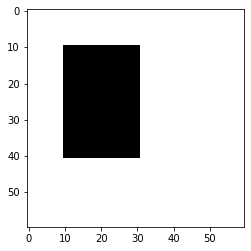

In [5]:
#Creating a rectangle
rectangle_data = np.ones((60, 60, 3), dtype=np.double)
rr,cc=get_rectangle(40,10,20,30)
rr,cc=polygon(rr,cc, rectangle_data.shape)
rectangle_data[rr, cc, :] = 0
plt.imshow(rectangle_data)
plt.show()

The function below is taken from [Gabor Filter](https://en.wikipedia.org/wiki/Gabor_filter). <br>
It is slightly modified to form square kernels.

In [6]:
'''This piece of code is taken from https://en.wikipedia.org/wiki/Gabor_filter''' 
def gabor(ksize,sigma, theta, Lambda, psi, gamma):
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = sigma/gamma

    # Bounding box
    xmax = ksize/2
    ymax = ksize/2
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

#### Question 1:

##### Creating the filter banks :

In [7]:
angles=[np.pi,np.pi/3,-np.pi/3,np.pi/2]
filter_banks=[]
for angle in angles :
    kernel = gabor(ksize=10,sigma=1,theta=angle,Lambda=2,psi=4,gamma=1) 
    filter_banks.append(kernel)

The function recognize uses the filter banks and thresholds to recognize whether a shape is a triangle or a rectangle,
based on gabor filter's response at different angles.

In [8]:
def recognize(data,filter_banks,threshold) :
    res=[]
    for filtr in filter_banks :
        filterd=ndi.convolve(data,filtr,mode='wrap')
        filterd[filterd<threshold] = 0
        res.append(1) if filterd.mean() else res.append(0)
    if res[0] and res[1] and res[2] :     #At 180, 60 and 120 degrees
        return 'triangle'
    elif res[0] and res[3] :    #At 180 and 90 degrees
        return 'rectangle'
    return 'unknown'

Using Gabor filters to recognize different shapes :

In [9]:
triangle_data=color.rgb2gray(triangle_data)
rectangle_data=color.rgb2gray(rectangle_data)
print(recognize(rectangle_data,filter_banks,0.70))
print(recognize(triangle_data,filter_banks,0.70))

rectangle
triangle


##### Visualizing the response of gabor filter at different angles :

**Triangle:**

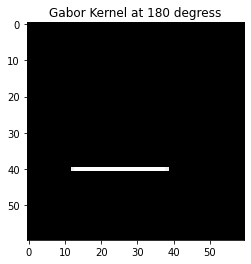

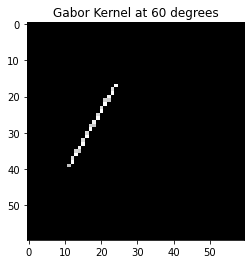

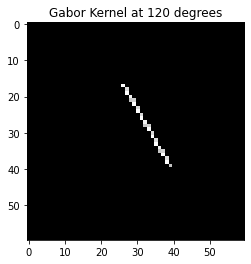

In [10]:
angles=[np.pi,np.pi/3,-np.pi/3]
title={np.pi:'180 degress',np.pi/3:'60 degrees',-np.pi/3:'120 degrees'}
for angle in angles :
    kernel = gabor(ksize=10,sigma=1,theta=angle,Lambda=5,psi=4,gamma=1)
    filterd = ndi.convolve(triangle_data, kernel, mode='wrap')
    filterd[filterd<0.75] = 0
    plt.imshow(filterd, cmap='gray')
    plt.title('Gabor Kernel at '+str(title[angle]))
    plt.show()

**Rectangle:**

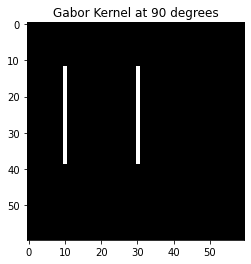

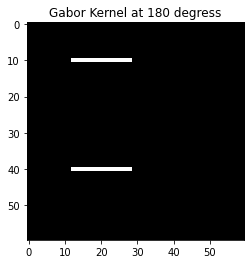

In [11]:
angles=[np.pi/2,np.pi]
title={np.pi:'180 degress',np.pi/2:'90 degrees'}
for angle in angles :
    kernel = gabor(ksize=10,sigma=1,theta=angle,Lambda=2,psi=4,gamma=1)
    filterd = ndi.convolve(rectangle_data, kernel, mode='wrap')
    filterd[filterd<0.75] = 0
    plt.imshow(filterd, cmap='gray')
    plt.title('Gabor Kernel at '+str(title[angle]))
    plt.show()

#### Question 2 and Question 3:

In [12]:
#Importing the required libraries
import random

The function get_positions returns random positions where shapes can be drawn. It takes four arguments where number is the number of positions to be returned.

In [13]:
def get_positions(start,end,gap,number):
#Returns Random positions for drawing images
    pos=[]
    k=0
    while k!=number :
        i=random.randrange(start,end,gap)
        j=random.randrange(start,end,gap)
        if (i,j) not in pos :
            pos.append((i,j))
            k=k+1
    return pos

The function draw_shape is used to draw the mentioned shape. <br>(x,y) is one of the base coordinate and colour is the colour of the shape which is to be drawn.

In [14]:
def draw_shape(x,y,shape,colour,shapes,image) :
    if colour == 'red' :
        colouring=[255,0,0]
    elif colour == 'blue' :
        colouring=[0,0,255]
    img = np.ones((500, 500, 3), np.uint8) * 255
    if shape=='triangle' :
        rr,cc=get_triangle(x,y,40)
    elif shape=='square' :
        rr,cc=get_rectangle(x,y,30,30)
    rr,cc=polygon(rr,cc, img.shape)
    rr,cc=polygon(rr,cc, image.shape)
    img[rr, cc, :] = colouring
    image[rr,cc, :] = colouring
    shapes.append(img)
    

The function feature_paradigm takes the shape, colour and number of objects as arguments and returns the image with the objects as output. <br>
It creates one object which differs from the rest by one feature. The feature that gets changed (colour or shape) is chosen randomly.

In [15]:
def feature_paradigm(shape,colour,image,number,shapes,points) :
    positions= get_positions(60,400,60,number)
    #Choosing a random position for placing the odd object
    odd=random.randint(0, len(positions)-1)
    for i in range(len(positions)) :
        x,y=positions[i]  
        if i != odd :
            points.append((x,y))
            draw_shape(x,y,shape,colour,shapes,image)
    x,y=positions[odd]
    points.append((x,y))
    #Randomly choosing the feature change
    if random.randint(0,1) :
        colour = 'red' if colour == 'blue' else 'blue'
        draw_shape(x,y,shape,colour,shapes,image)
    else :
        shape= 'triangle' if shape == 'square' else 'square'
        draw_shape(x,y,shape,colour,shapes,image)
    return image

The function conjunction_paradigm takes the colour of the triangle, colour of the square and number of objects as arguments and returns the image with the objects as output.

In [16]:
def conjunction_paradigm(square_colour,triangle_colour,image,number,shapes,points) :
    positions= get_positions(60,400,60,number)
    #Randomly choosing the position of the odd image
    odd=random.randint(0, len(positions)-1)
    for i in range(len(positions)) :
        x,y=positions[i]
        
        if i!=odd :
            if i%2 == 0 :
                draw_shape(x,y,'triangle',triangle_colour,shapes,image)
                points.append((x,y))
            else :
                draw_shape(x,y,'square',square_colour,shapes,image)
                points.append((x,y))
        
    x,y=positions[odd]
    if odd%2 == 0 :
        triangle_colour= 'red' if triangle_colour== 'blue' else 'blue'
        draw_shape(x,y,'triangle',triangle_colour,shapes,image)
        points.append((x,y))
        
    else :
        square_colour= 'red' if square_colour== 'blue' else 'blue'
        draw_shape(x,y,'square',square_colour,shapes,image)
        points.append((x,y))
        
    return image

This function below takes the search_type, the shape and the colour of the object and the number of distractors.
It uses the function feature_paradigm() and conjunction_paradigm() internally. <br>
It returns the image with the objects, a list containing the shape description and a list containing the positions of the image.

In [17]:
def paradigm(search_type,shape,colour,distractors,plot=False) :
    image = np.ones((500, 500, 3), np.uint8) * 255
    shapes=[]
    points=[]
    if search_type=='feature' :
        im=feature_paradigm(shape,colour,image,distractors,shapes,points)
        if plot :
            plt.imshow(im)
            plt.show() 
    elif search_type=='conjunction' :
        if shape=='square' :
            square_colour=colour
            triangle_colour='red' if colour=='blue' else 'blue'
        elif shape=='triangle' :
            triangle_colour=colour
            square_colour='red' if colour=='blue' else 'blue'
        im=conjunction_paradigm(square_colour,triangle_colour,image,distractors,shapes,points)
        if plot :
                plt.imshow(im)
                plt.show()
    return im,shapes,points

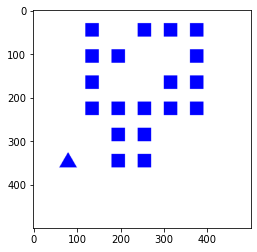

In [18]:
image1,shapes1,points1=paradigm(search_type='feature',shape='square',colour='blue',distractors=20,plot=True)

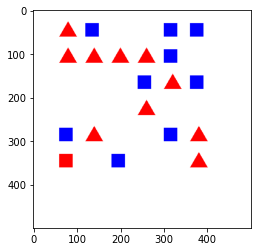

In [19]:
image2,shapes2,points2=paradigm(search_type='conjunction',shape='square',colour='blue',distractors=20,plot=True)

The function below is used to create a box around the odd object. It takes the position of the odd object, its shape and colour as arguements.

In [20]:
def plot_odd(x,y,im,odd_shape,odd_colour) : 
    fig, ax = plt.subplots()
    # Displays the image
    ax.imshow(im)
    # Creates a Rectangle patch
    rect = patches.Rectangle((y-10, x-40), 50, 50, linewidth=2, edgecolor='black', facecolor='none')
    # Adds the patch to the Axes
    ax.add_patch(rect)
    plt.title('ODD: '+str(odd_colour)+' '+str(odd_shape))
    plt.show()

The function get_shapeinfo takes the points where the images are present, the object list (The variable is named as shapes) and identifies the colour and shape of each of the object. 

In [21]:
def get_shapeinfo(shapes,points,image) :   
    recognized_shapes=[]
    recognized_colour=[]
    for i in range(len(shapes)) :
        x,y=points[i]
        img=color.rgb2gray(shapes[i])
        if recognize(img,filter_banks,0.60)=='rectangle' :
             recognized_shapes.append('square')
        else :
            recognized_shapes.append(recognize(img,filter_banks,0.60))
            
        if image[x,y][0] == 255 :
            recognized_colour.append('red')
        else :
            recognized_colour.append('blue')
    return recognized_shapes,recognized_colour   

The function find_odd_feature is used to recognise the odd object among the distractors for feature search. It takes the lists returned by the function get_shapeinfo as arguments.

In [22]:
def find_odd_feature(image,shapes,points,recognized_shapes,recognized_colour) :
    set_shape=set(recognized_shapes)
    set_colour=set(recognized_colour)
    count_square=0
    count_triangle=0
    count_red=0
    count_blue=0
    if len(set_colour)==1 :
        for i in range(len(shapes)) :
           
            if recognized_shapes[i] == 'square' :
                xs,ys=points[i]
                count_square=count_square+1
            else :
                xt,yt=points[i]
                count_triangle=count_triangle+1
    else :
        for i in range(len(shapes)) :
            
            if recognized_colour[i] == 'red' :
                xr,yr=points[i]
                count_red=count_red+1
            else :
                xb,yb=points[i]
                count_blue=count_blue+1
    if count_blue == 1:
        return 'blue',list(recognized_shapes)[0],xb,yb
    if count_red == 1:
        return 'red',list(recognized_shapes)[0],xr,yr
    if count_square == 1:
        return list(recognized_colour)[0],'square',xs,ys
    if count_triangle == 1:
        return list(recognized_colour)[0],'triangle',xt,yt

##### Recognizing the odd object (Feature Search) :

In [23]:
recognized_shapes, recognized_colour= get_shapeinfo(shapes1,points1,image1)
odd_colour,odd_shape,x,y=find_odd_feature(image1,shapes1,points1,recognized_shapes,recognized_colour)

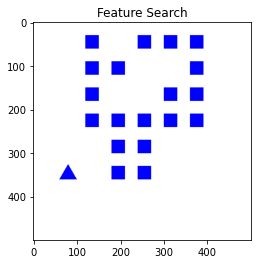

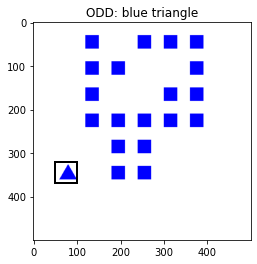

In [24]:
plt.imshow(image1)
plt.title('Feature Search')
plt.show()
plot_odd(x,y,image1,odd_shape,odd_colour)

The function find_odd_conjunction is used to recognise the odd object among the distractors for conjunction search. It takes the lists returned by the function get_shapeinfo as arguments.

In [25]:
def find_odd_conjunction(image,shapes,points,recognized_shapes,recognized_colour) :
    red=[0,0]  #0th is for square and 1 is for triangle
    blue=[0,0] #0th is for square and 1 is for triangle
    for i in range(len(shapes)) :
        time.sleep(0.00001)
        x,y=points[i]
        if recognized_shapes[i] == 'square' :
            if recognized_colour[i] == 'red' :
                red[0]=red[0]+1
                xrs,yrs=x,y
            elif recognized_colour[i] == 'blue' :
                blue[0]=blue[0]+1
                xbs,ybs=x,y
        
        if recognized_shapes[i] == 'triangle' :
            if recognized_colour[i] == 'red' :
                red[1]=red[1]+1
                xrt,yrt=x,y
            elif recognized_colour[i] == 'blue' :
                blue[1]=blue[1]+1
                xbt,ybt=x,y
    if red[0]== 1 :
        return 'red','square',xrs,yrs
    elif red[1] == 1 :
        return 'red','triangle',xrt,yrt
    elif blue[0] == 1 :
         return 'blue','square',xbs,ybs
    else :
         return 'blue','triangle',xbt,ybt

##### Recognizing the odd object (Conjunction Search) :

In [26]:
recognized_shapes, recognized_colour= get_shapeinfo(shapes2,points2,image2)
odd_colour,odd_shape,x,y=find_odd_conjunction(image2,shapes2,points2,recognized_shapes,recognized_colour)

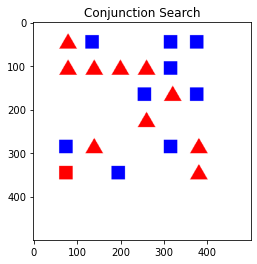

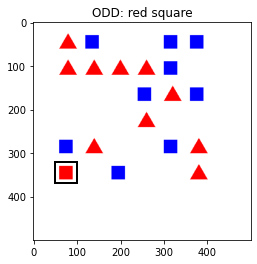

In [27]:
plt.imshow(image2)
plt.title('Conjunction Search')
plt.show()
plot_odd(x,y,image2,odd_shape,odd_colour)

The function calculate_time is used to calculate the response time for feature search and conjunction search. The shapes and colours for feature paradigm and conjunction paradigm are chosen randomly.

In [28]:
def calculate_time(distractors,search_type) :
    
    if random.randint(0,1) :
        colour='red'
    else :
        colour='blue'
    if random.randint(0,1) :
        shape='square'
    else :
        shape='triangle'
    
    if search_type== 'feature' :
        image1,shapes1,points1=paradigm(search_type='feature',shape=shape,colour=colour,distractors=distractors,plot=False)
        recognized_shapes, recognized_colour= get_shapeinfo(shapes1,points1,image1)
        start=time.time()
        odd_colour,odd_shape,x,y=find_odd_feature(image1,shapes1,points1,recognized_shapes,recognized_colour)
        end=time.time()
        total=end-start
        plot_odd(x,y,image1,odd_shape,odd_colour)
        
    elif search_type=='conjunction' :
        image2,shapes2,points2=paradigm(search_type='conjunction',shape=shape,colour=colour,distractors=distractors,plot=False)
        recognized_shapes, recognized_colour= get_shapeinfo(shapes2,points2,image2)
        start=time.time()
        odd_colour,odd_shape,x,y=find_odd_conjunction(image2,shapes2,points2,recognized_shapes,recognized_colour)
        end=time.time()
        total=end-start
        plot_odd(x,y,image2,odd_shape,odd_colour)
    return total

##### Plotting the response time v/s Number of objects graph for feature search and conjunction search:
*Note: The code below takes around 3 minutes to run. Kindly let the kernel run for twice the amount of time in worst case.*

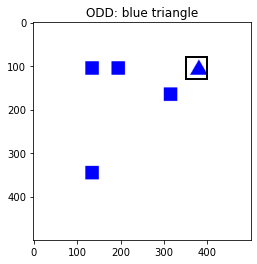

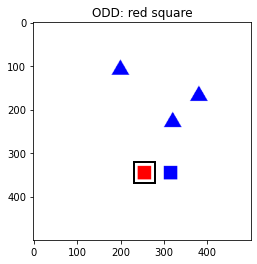

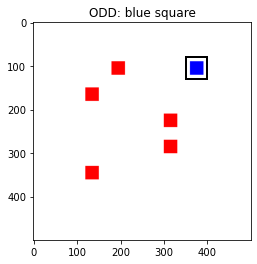

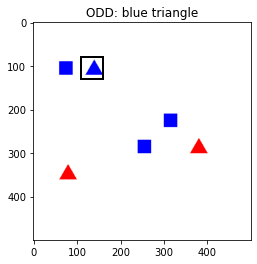

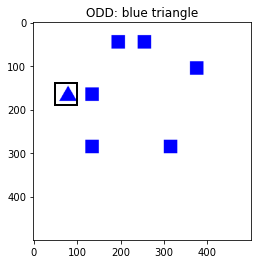

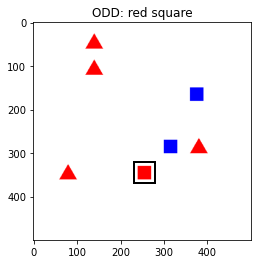

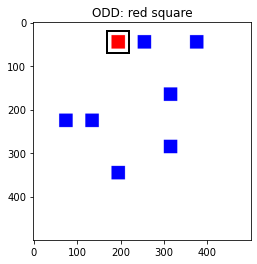

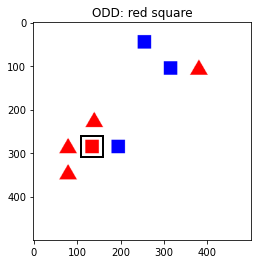

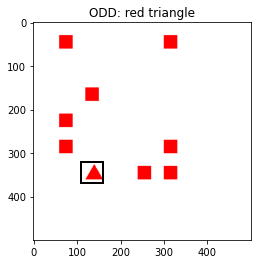

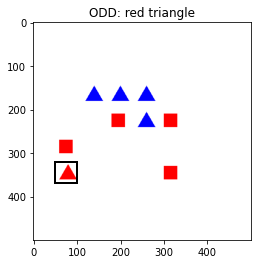

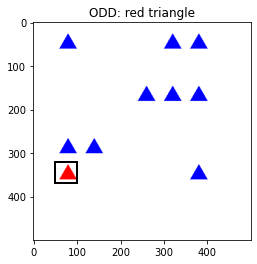

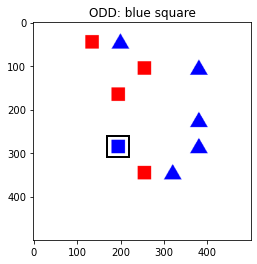

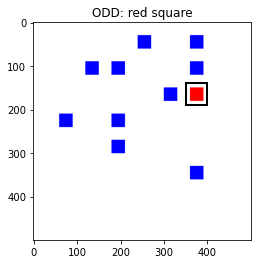

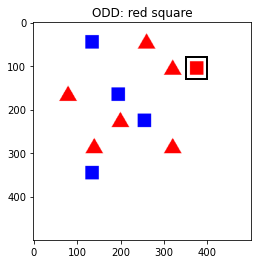

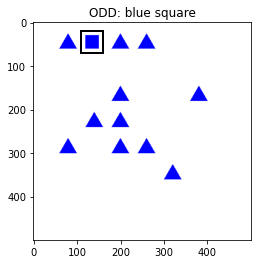

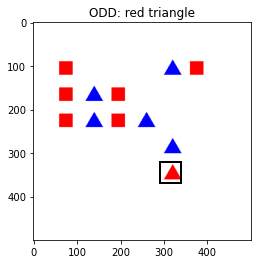

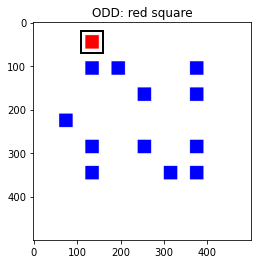

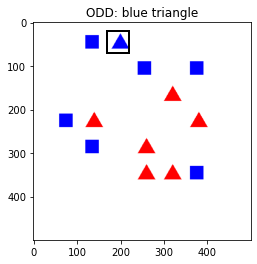

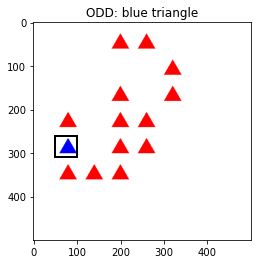

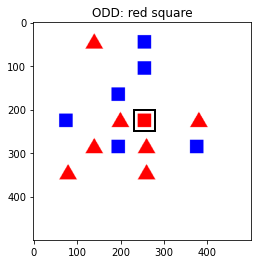

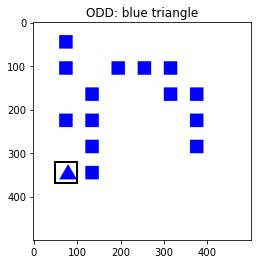

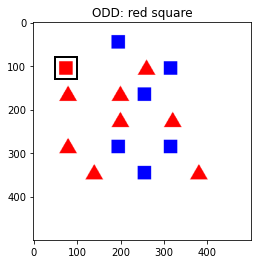

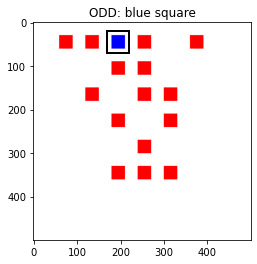

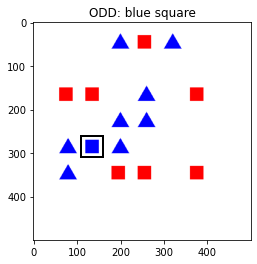

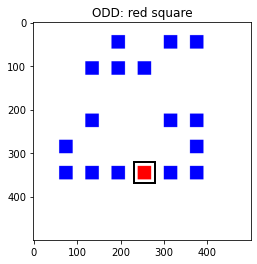

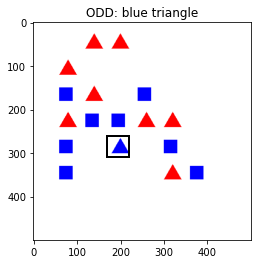

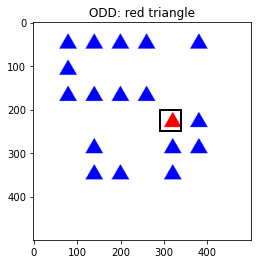

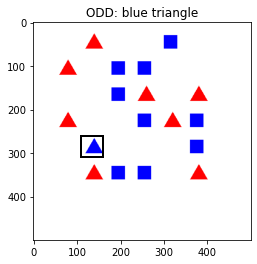

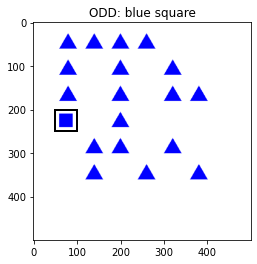

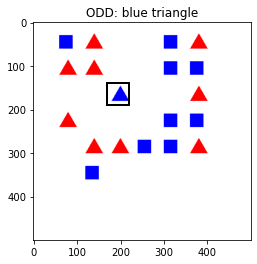

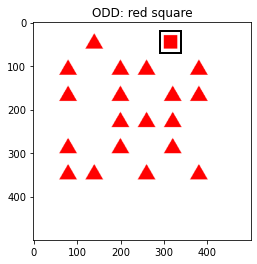

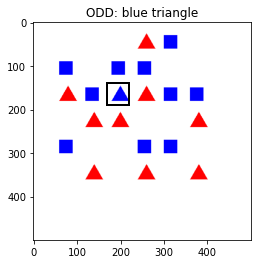

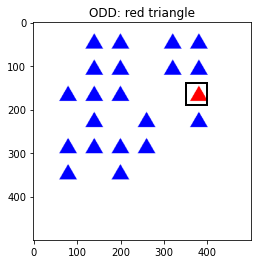

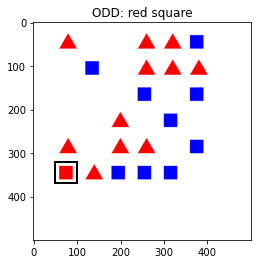

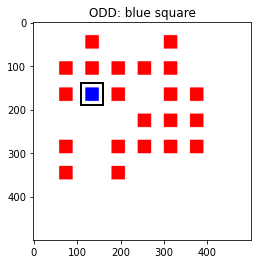

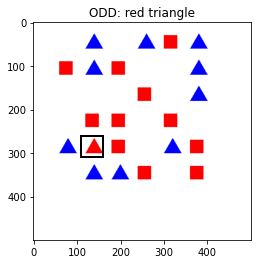

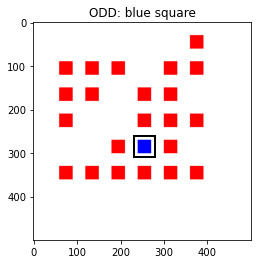

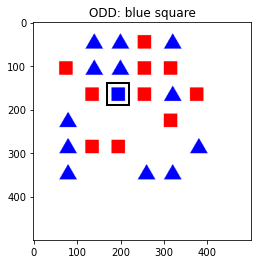

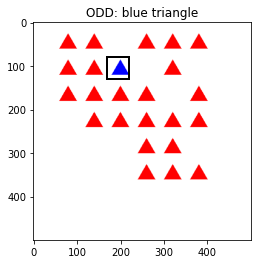

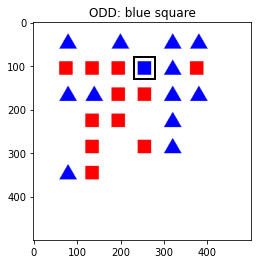

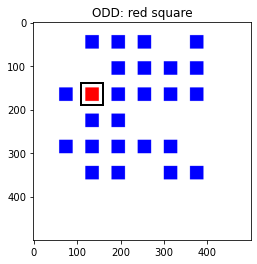

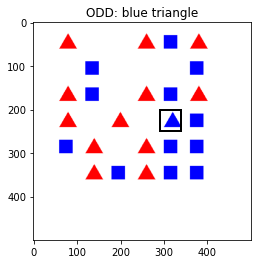

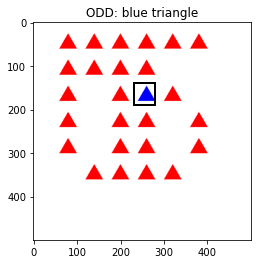

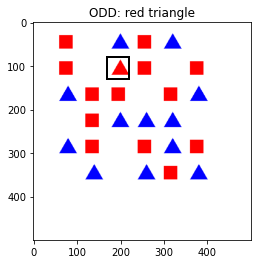

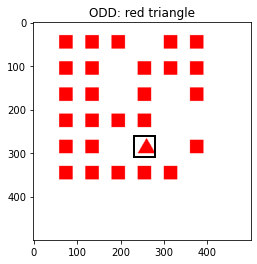

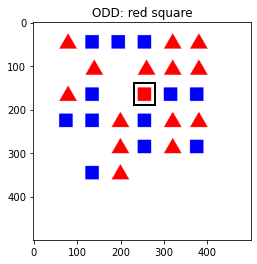

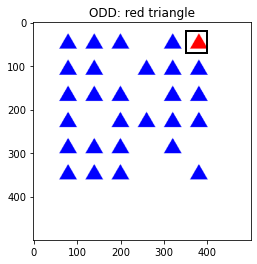

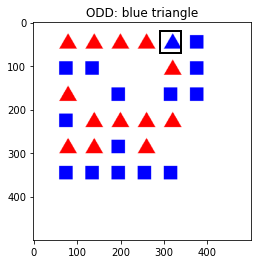

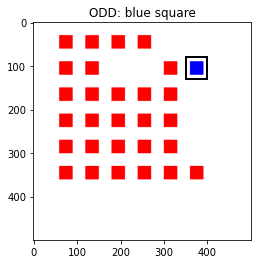

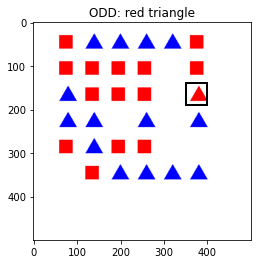

In [29]:
distractors=np.arange(5, 30)
feature_time=[]
conjunction_time=[]
for d in distractors :
    feature_time.append(calculate_time(d,'feature'))
    conjunction_time.append(calculate_time(d,'conjunction'))
    

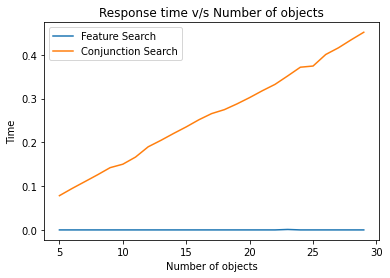

In [30]:
plt.plot(distractors,feature_time,label='Feature Search')
plt.plot(distractors,conjunction_time,label='Conjunction Search')
plt.legend()
plt.title('Response time v/s Number of objects')
plt.xlabel('Number of objects')
plt.ylabel('Time')
plt.show()

**Comments:** <br>
Response time increases with increase in number of objects for conjunction search whereas for feature search it remains constant with increase in number of objects.

References :
1. [Gabor Filter](https://en.wikipedia.org/wiki/Gabor_filter)
2. [Visual Search](https://en.wikipedia.org/wiki/Visual_search)

Acknowledgements :
- My peers Manjyot Singh Nanra and Debdeep Paul Chaudhuri have helped me in understanding the problem statement in a better manner.